# MMS minimum variance analysis

This notebook shows how to transform MMS tplot variables into minimum variance analysis coordinates

This command sets up the PySPEDAS environment when running in Google Colab.  You can skip it or comment it out if you're running this notebook in an environment that already has PySPEDAS installed.


In [ ]:
!pip install pyspedas

First, load some FGM data

In [2]:
import pyspedas

In [ ]:
pyspedas.mms.fgm(probe=1, trange=['2015-10-16', '2015-10-17'])

## Single transformation - limited time range

In [4]:
from pyspedas.cotrans.minvar_matrix_make import minvar_matrix_make

Calculate the transformation matrix

In [5]:
minvar_matrix_make('mms1_fgm_b_gse_srvy_l2_bvec',
                   newname='mva_mat_day',
                   tstart='2015-10-16/13:00', 
                   tstop='2015-10-16/14:00')

['mva_mat_day']

Rotate the B-field data using the MVA matrix

In [6]:
from pyspedas.cotrans.tvector_rotate import tvector_rotate

In [7]:
tvector_rotate('mva_mat_day', 'mms1_fgm_b_gse_srvy_l2_bvec', newname='mva_data_day')

['mva_data_day']

Set some metadata

In [9]:
from pytplot import options

options('mva_data_day', 'labels', ['Bi GSE', 'Bj GSE', 'Bk GSE'])
options('mva_data_day', 'ysubtitle', 'single transformation\n[nT]')

In [11]:
from pytplot import tlimit

tlimit(['2015-10-16/13:00', '2015-10-16/14:00'])

Plot the FGM data translated into MVA coordinates using a single transformation matrix

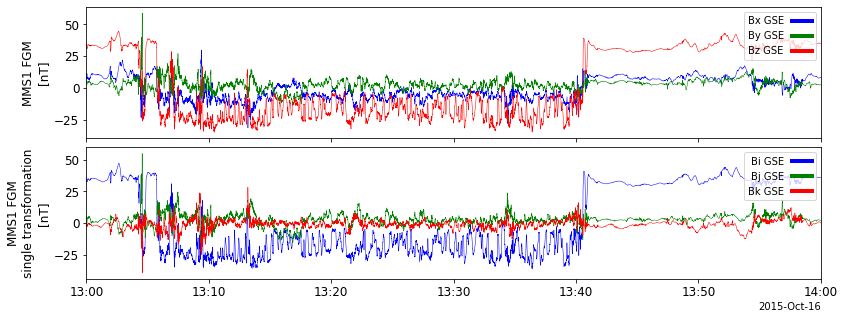

In [13]:
from pytplot import tplot

tplot(['mms1_fgm_b_gse_srvy_l2_bvec',
       'mva_data_day'])

## Multiple transformations - 1 hours sliding average (5 min increment)

First, calculate the MVA matrices:

In [14]:
minvar_matrix_make('mms1_fgm_b_gse_srvy_l2_bvec', 
                   newname='mva_mat_hour',
                   twindow=3600, 
                   tslide=300)

['mva_mat_hour']

Now rotate the B-field using the matrices

In [15]:
tvector_rotate('mva_mat_hour', 'mms1_fgm_b_gse_srvy_l2_bvec', newname='mva_data_hour')

['mva_data_hour']

In [22]:
options('mva_data_hour', 'legend_names', ['Bi GSE', 'Bj GSE', 'Bk GSE'])
options('mva_data_hour', 'ysubtitle', '1 hour sliding avg\n[nT]')

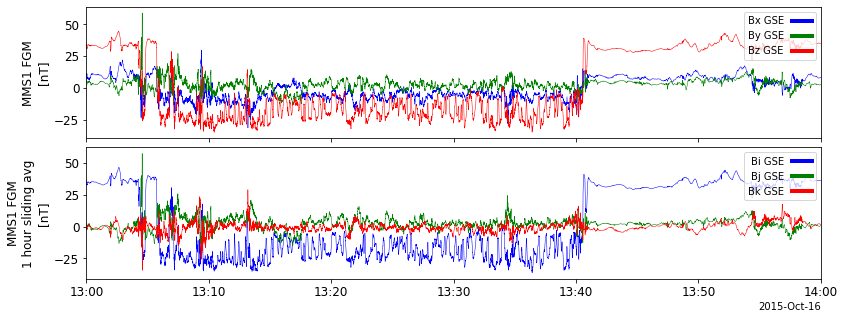

In [23]:
tplot(['mms1_fgm_b_gse_srvy_l2_bvec',
       'mva_data_hour'])